<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setting" data-toc-modified-id="Setting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setting</a></span><ul class="toc-item"><li><span><a href="#Path" data-toc-modified-id="Path-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Path</a></span></li><li><span><a href="#dtype" data-toc-modified-id="dtype-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>dtype</a></span></li><li><span><a href="#read_csv" data-toc-modified-id="read_csv-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>read_csv</a></span></li></ul></li><li><span><a href="#Datetime" data-toc-modified-id="Datetime-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Datetime</a></span><ul class="toc-item"><li><span><a href="#時間単位に丸める" data-toc-modified-id="時間単位に丸める-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>時間単位に丸める</a></span></li><li><span><a href="#click-counts" data-toc-modified-id="click-counts-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>click counts</a></span><ul class="toc-item"><li><span><a href="#plot" data-toc-modified-id="plot-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>plot</a></span></li></ul></li><li><span><a href="#prop_downloaded" data-toc-modified-id="prop_downloaded-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>prop_downloaded</a></span><ul class="toc-item"><li><span><a href="#plot" data-toc-modified-id="plot-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>plot</a></span></li></ul></li><li><span><a href="#Compare" data-toc-modified-id="Compare-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Compare</a></span><ul class="toc-item"><li><span><a href="#plot" data-toc-modified-id="plot-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>plot</a></span></li></ul></li></ul></li><li><span><a href="#time" data-toc-modified-id="time-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>time</a></span><ul class="toc-item"><li><span><a href="#時間単位に丸める" data-toc-modified-id="時間単位に丸める-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>時間単位に丸める</a></span></li><li><span><a href="#click" data-toc-modified-id="click-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>click</a></span><ul class="toc-item"><li><span><a href="#plot" data-toc-modified-id="plot-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>plot</a></span></li></ul></li><li><span><a href="#prop_downloaded" data-toc-modified-id="prop_downloaded-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>prop_downloaded</a></span><ul class="toc-item"><li><span><a href="#plot" data-toc-modified-id="plot-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>plot</a></span></li></ul></li><li><span><a href="#Compare" data-toc-modified-id="Compare-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Compare</a></span><ul class="toc-item"><li><span><a href="#plot" data-toc-modified-id="plot-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>plot</a></span></li></ul></li></ul></li></ul></div>

# eda_with_dask__time_pattern <a class='tocSkip'>

In [165]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import dask.dataframe as dd

%matplotlib inline

# Setting

## Path

In [166]:
HOME_PATH = Path(os.getcwd()).parent
dire = str(HOME_PATH)
print(os.path.exists(dire))
print(dire)
    
data_Path = HOME_PATH / "data"
dire = str(data_Path)
print(os.path.exists(dire))
print(dire)

raw_data_Path = data_Path / "raw"
dire = str(raw_data_Path)
print(os.path.exists(dire))
print(dire)

train_csv_Path = raw_data_Path / "train.csv"
dire = str(train_csv_Path)
print(os.path.exists(dire))
print(dire)

train_sample_csv_Path = raw_data_Path / "train_sample.csv"
dire = str(train_sample_csv_Path)
print(os.path.exists(dire))
print(dire)

test_csv_Path = raw_data_Path / "test.csv"
dire = str(test_csv_Path)
print(os.path.exists(dire))
print(dire)

interim_data_Path = data_Path / "interim"
dire = str(interim_data_Path)
print(os.path.exists(dire))
print(dire)


True
/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge
True
/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data
True
/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/raw
True
/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/raw/train.csv
True
/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/raw/train_sample.csv
True
/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/raw/test.csv
True
/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/interim


## dtype

In [167]:
dtypes = {
    "ip" : "uint32",
    "app" : "uint16",
    "device" : "uint16",
    "os" : "uint16",
    "channel" : "uint16",
    "is_attributed" : "uint8",
}

## read_csv
必要最低限のdata型を指定してやるとメモリを節約ができるのでここでもちゃんと指定しています。
読み込んでいます。

In [168]:
df_train = dd.read_csv(urlpath=str(train_csv_Path),
                       #blocksize=3*64000000,
                       dtype=dtypes,
                       parse_dates=["click_time", "attributed_time"],
                      )

In [169]:
df_train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaT,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaT,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaT,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaT,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaT,0


In [170]:
# 118個に分割されていることがわかります。
df_train.npartitions

118

# Datetime

日付と時刻（時間単位）に対するクリック数

In [241]:
section = "datetime"
fea = "click_rnd"

## 時間単位に丸める
最も近い時間に丸める

In [172]:
df_train[fea] = df_train["click_time"].dt.round('H')
df_train.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed', 'click_rnd'],
      dtype='object')

## click counts

In [173]:
click_counts = df_train[[fea,"is_attributed"]].groupby(by=fea).count().reset_index()
click_counts.columns = [fea, "click_counts"]

In [174]:
click_counts.head()

,click_rnd,click_counts
0,2017-11-06 15:00:00,83
1,2017-11-06 16:00:00,1312093
2,2017-11-06 17:00:00,1728211
3,2017-11-06 18:00:00,943727
4,2017-11-06 19:00:00,599021


In [175]:
%%time
# save
click_counts.to_csv(filename=str(interim_data_Path / ("train_" + section + fea+"_" + "_click_counts-*.csv")),
                    index=False,
                   )

CPU times: user 7min, sys: 26.4 s, total: 7min 26s
Wall time: 4min 22s


['/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/interim/train_datetimeclick_rnd__click_counts-0.csv']

### plot

In [242]:
#click_counts = pd.read_csv(filepath_or_buffer=str(interim_data_Path / ("train_" + section + fea+"_" + "_click_counts-0.csv")),
#                           index_col=0,
#                           parse_dates=[fea],
#                          )

In [243]:
tmp = dd.read_csv(urlpath=str(interim_data_Path / ("train_" + section + fea+"_" + "_click_counts-0.csv")),
                  parse_dates=[fea],
                 )
click_counts = tmp.set_index(other=fea, drop=True, sorted=True)
del tmp

In [244]:
click_counts.head()

,click_counts
click_rnd,
2017-11-06 15:00:00,83
2017-11-06 16:00:00,1312093
2017-11-06 17:00:00,1728211
2017-11-06 18:00:00,943727
2017-11-06 19:00:00,599021


In [251]:
len(click_counts.index.compute())

74

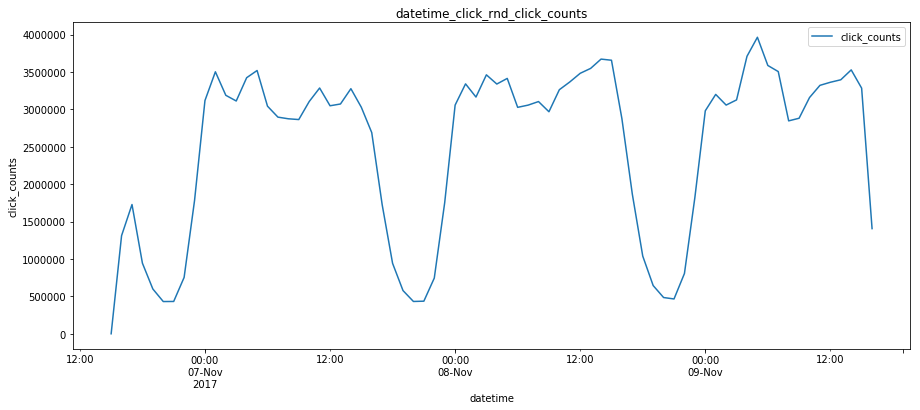

In [260]:
# plot
title = section + "_" + fea + "_click_counts"

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 1, 1)
click_counts[["click_counts"]].compute().plot(ax=ax1)
ax1.set_ylabel(ylabel="click_counts")
ax1.set_xlabel(xlabel="datetime")

ax1.set_title(label=title)
fig.savefig(fname=str(data_Path / "plot" / title))

## prop_downloaded

In [180]:
prop_downloaded = df_train[[fea,"is_attributed"]].groupby(by=fea).mean().reset_index()
prop_downloaded.columns = [fea, "prop_downloaded"]

In [181]:
prop_downloaded.head()

,click_rnd,prop_downloaded
0,2017-11-06 15:00:00,0.000000
1,2017-11-06 16:00:00,0.001713
2,2017-11-06 17:00:00,0.001695
3,2017-11-06 18:00:00,0.001837
4,2017-11-06 19:00:00,0.001873


In [182]:
%%time
# save
prop_downloaded.to_csv(filename=str(interim_data_Path / ("train_"+section+"_"+fea+"_isAttributed_proportion-*.csv")),
                       index=False,
                      )

CPU times: user 7min 8s, sys: 27 s, total: 7min 35s
Wall time: 4min 25s


['/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/interim/train_datetime_click_rnd_isAttributed_proportion-0.csv']

### plot

In [261]:
#prop_downloaded = pd.read_csv(filepath_or_buffer=str(interim_data_Path / ("train_"+section+"_"+fea+"_isAttributed_proportion-0.csv")),
#                              index_col=0,
#                              parse_dates=[fea],
#                             )

In [262]:
tmp = dd.read_csv(urlpath=str(interim_data_Path / ("train_"+section+"_"+fea+"_isAttributed_proportion-0.csv")),
                  parse_dates=[fea],
                 )
prop_downloaded = tmp.set_index(other=fea, drop=True)
del tmp

In [263]:
prop_downloaded.head()

,prop_downloaded
click_rnd,
2017-11-06 15:00:00,0.000000
2017-11-06 16:00:00,0.001713
2017-11-06 17:00:00,0.001695
2017-11-06 18:00:00,0.001837
2017-11-06 19:00:00,0.001873


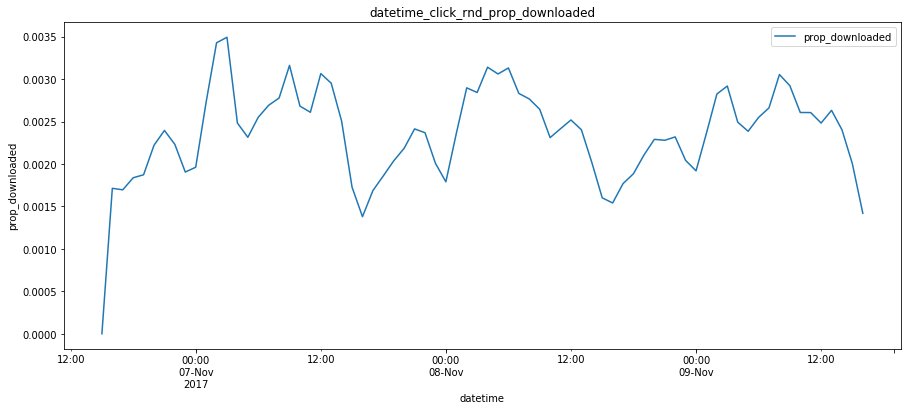

In [264]:
# plot
title = section + "_" + fea + "_prop_downloaded"

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 1, 1)
prop_downloaded[["prop_downloaded"]].compute().plot(ax=ax1)
ax1.set_ylabel(ylabel="prop_downloaded")
ax1.set_xlabel(xlabel="datetime")

ax1.set_title(label=title)
fig.savefig(fname=str(data_Path / "plot" / title))

## Compare

### plot

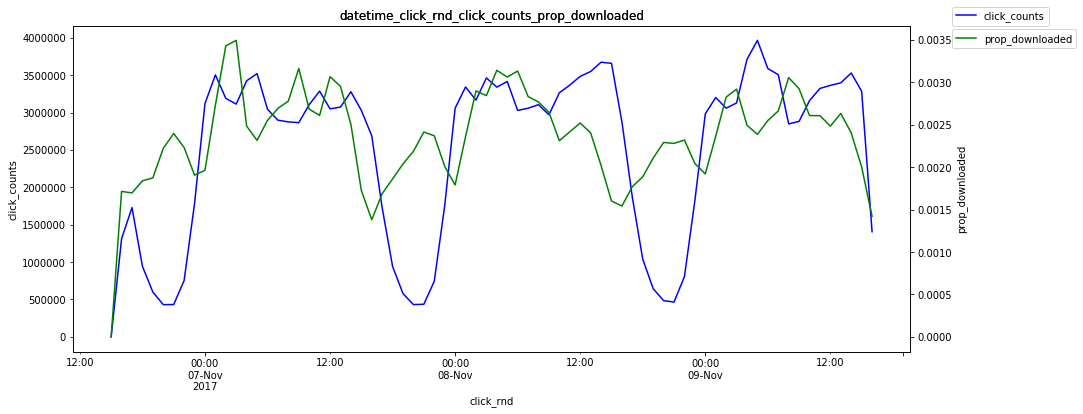

In [265]:
# plot
title = section + "_" + fea + "_click_counts_prop_downloaded"

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 1, 1)


ax1.yaxis.tick_left()
ax1.yaxis.set_label_position("left")
click_counts[["click_counts"]].compute().plot(ax=ax1, color="blue")
ax1.set_ylabel(ylabel="click_counts")
ax1.legend(loc=3, bbox_to_anchor=(1.05, 1), borderaxespad=0.)

ax2 = ax1.twinx()
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
prop_downloaded[["prop_downloaded"]].compute().plot(ax=ax2, color="green")
ax2.set_ylabel(ylabel="prop_downloaded")

ax2.set_title(title)
ax2.set_xlabel(fea)

ax2.legend(loc=3, bbox_to_anchor=(1.05, 1 - 0.07), borderaxespad=0.)

ax1.set_title(label=title)
fig.savefig(fname=str(data_Path / "plot" / title))

# time

時刻（時間単位）に対するクリック数

In [266]:
section = "time"
fea = "click_hour"

## 時間単位に丸める
最も近い時間に丸める

In [189]:
# 時間単位に丸める
df_train[fea]=df_train["click_time"].dt.hour

In [190]:
df_train[fea].head()

0    14
1    14
2    14
3    14
4    14
Name: click_hour, dtype: int64

## click

In [191]:
click_counts = df_train[[fea,"is_attributed"]].groupby(by=fea).count().reset_index()
click_counts.columns = [fea, "click_counts"]

In [192]:
click_counts = click_counts.nsmallest(n=24, columns=fea).reset_index(drop=True)

In [193]:
click_counts.head()

,click_hour,click_counts
0,0,10416435
1,1,9456661
2,2,9750363
3,3,9743476
4,4,11223316


In [194]:
%%time
# save
click_counts.to_csv(filename=str(interim_data_Path / ("train_" + section + fea+"_" + "_click_counts-*.csv")),
                    index=False,
                   )

CPU times: user 7min 16s, sys: 27.8 s, total: 7min 44s
Wall time: 4min 27s


['/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/interim/train_timeclick_hour__click_counts-0.csv']

### plot

In [267]:
#click_counts = pd.read_csv(filepath_or_buffer=str(interim_data_Path / ("train_" + section + fea+"_" + "_click_counts-0.csv")),
#                           index_col=0,
#                          )

In [268]:
tmp = dd.read_csv(urlpath=str(interim_data_Path / ("train_" + section + fea+"_" + "_click_counts-0.csv")),
                  parse_dates=[fea],
                 )
click_counts = tmp.set_index(other=fea, drop=True, sorted=True)
del tmp

In [269]:
click_counts.head()

,click_counts
click_hour,
0,10416435
1,9456661
2,9750363
3,9743476
4,11223316


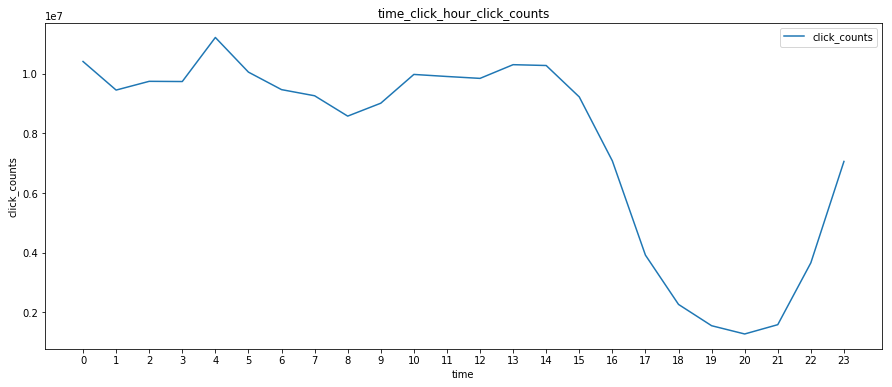

In [270]:
# plot
title = section + "_" + fea + "_click_counts"

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 1, 1)
click_counts[["click_counts"]].compute().plot(ax=ax1)
ax1.set_ylabel(ylabel="click_counts")
ax1.set_xlabel(xlabel=section)
ax1.set_xticks(np.arange(0, 24, step=1))
ax1.set_xticklabels(labels=click_counts.index.values.compute())

ax1.set_title(label=title)
fig.savefig(fname=str(data_Path / "plot" / title))

## prop_downloaded

In [155]:
prop_downloaded = df_train[[fea,"is_attributed"]].groupby(by=fea).mean().reset_index()
prop_downloaded.columns = [fea, "prop_downloaded"]

In [156]:
prop_downloaded.head()

,click_hour,prop_downloaded
0,14,0.002100
1,15,0.001430
2,16,0.001709
3,17,0.001773
4,18,0.001938


In [157]:
prop_downloaded = prop_downloaded.nsmallest(n=24, columns=fea).reset_index(drop=True)

In [158]:
prop_downloaded.head()

,click_hour,prop_downloaded
0,0,0.002083
1,1,0.002945
2,2,0.003016
3,3,0.002962
4,4,0.002605


In [159]:
%%time
# save
prop_downloaded.to_csv(filename=str(interim_data_Path / ("train_"+section+"_"+fea+"_isAttributed_proportion-*.csv")),
                       index=False,
                      )

CPU times: user 7min 22s, sys: 27.6 s, total: 7min 49s
Wall time: 4min 28s


['/home/sugihiro/workdir/git/bitbucket/learning_kaggle/TalkingData_AdTracking_Fraud_Detection_Challenge/data/interim/train_time_click_hour_isAttributed_proportion-0.csv']

### plot

In [271]:
#prop_downloaded = pd.read_csv(filepath_or_buffer=str(interim_data_Path / ("train_"+section+"_"+fea+"_isAttributed_proportion-0.csv")),
#                              index_col=0,
#                             )

In [272]:
tmp = dd.read_csv(urlpath=str(interim_data_Path / ("train_"+section+"_"+fea+"_isAttributed_proportion-0.csv")),
                  parse_dates=[fea],
                 )
prop_downloaded = tmp.set_index(other=fea, drop=True, sorted=True)
del tmp

In [273]:
prop_downloaded.head()

,prop_downloaded
click_hour,
0,0.002083
1,0.002945
2,0.003016
3,0.002962
4,0.002605


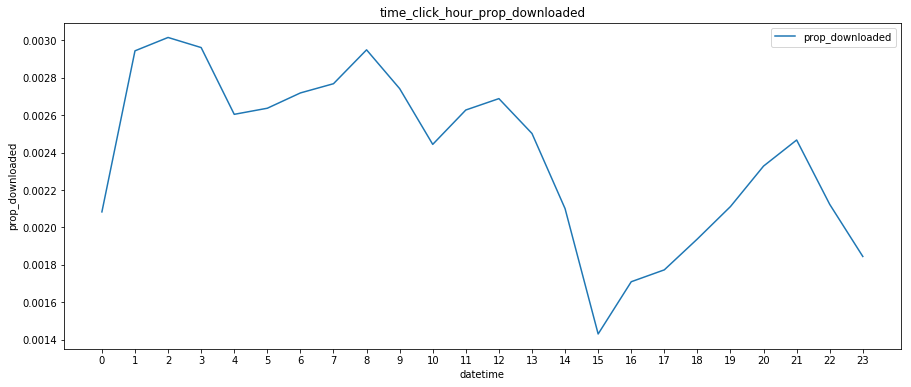

In [274]:
# plot
title = section + "_" + fea + "_prop_downloaded"

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 1, 1)
prop_downloaded[["prop_downloaded"]].compute().plot(ax=ax1)
ax1.set_ylabel(ylabel="prop_downloaded")
ax1.set_xlabel(xlabel="datetime")
ax1.set_xticks(np.arange(0, 24, step=1))
ax1.set_xticklabels(labels=prop_downloaded.index.values.compute())

ax1.set_title(label=title)
fig.savefig(fname=str(data_Path / "plot" / title))

## Compare

### plot

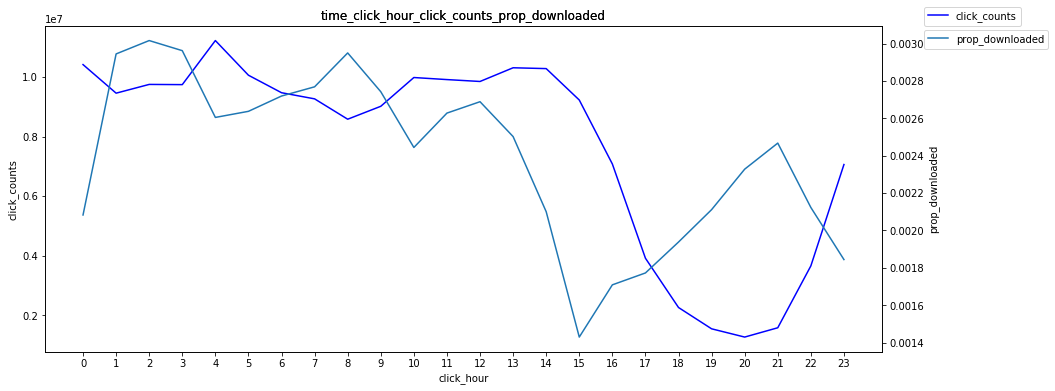

In [275]:
# plot
title = section + "_" + fea + "_click_counts_prop_downloaded"

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 1, 1)


ax1.yaxis.tick_left()
ax1.yaxis.set_label_position("left")
click_counts[["click_counts"]].compute().plot(ax=ax1, color="blue")
ax1.set_ylabel(ylabel="click_counts")
ax1.legend(loc=3, bbox_to_anchor=(1.05, 1), borderaxespad=0.)

ax2 = ax1.twinx()
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
prop_downloaded[["prop_downloaded"]].compute().plot(ax=ax2)
ax2.set_ylabel(ylabel="prop_downloaded")

ax2.set_title(title)
ax2.set_xlabel(fea)
ax1.set_xticks(np.arange(0, 24, step=1))
ax1.set_xticklabels(labels=prop_downloaded.index.values.compute())

ax2.legend(loc=3, bbox_to_anchor=(1.05, 1 - 0.07), borderaxespad=0.)

ax1.set_title(label=title)
fig.savefig(fname=str(data_Path / "plot" / title))